# Eniyileme

Kısıtsız eniyileme problemlerinin genel yapısı
\begin{align}
\text{minimize} & & E(w) 
\end{align}

* Algoritma :
\begin{align}
w_0 & = \text{başlangıç değeri} \\
\text{for}\;\; & \tau = 1, 2,\dots \\
& w_\tau = w_{\tau-1} + g_\tau
\end{align}

Burada, $g_\tau$ bir arama yönüdür. Amaç, döngüler sonucunda başlangıç noktasından daha düşük (idealde en düşük) bir fonksyon değeri bulmaktır.

## Bayır inişi
* negatif gradyan yönünde arama
\begin{align}
g_\tau & =  - \eta \nabla E(w_{\tau-1})
\end{align}

*  $\nabla E(w) = 0$ olduğunda algoritma çözüm noktasını değiştiremez. Bu tarz noktalara sabit nokta adı verilir.

* Bazen algoritma gerçek en küçük noktaya da yakınsar  $w^* = \arg\min_{w} E(w)$. Burada bu yakınsamanın hangi şartlarda ve hangi hızda gerçekleştiği önemli kavramsal sorulardır. 

* Burada, $\eta$'ya *adım büyüklüğü* veya *öğrenme hızı* gibi isimler verilir. Bu parametrenin düzgün seçilmesi pratikte epey deneme yanılma grektirmektedir. Düzgün seçilmezse algoritma yakınsamaz ve patlar, veya yakınsaması çok uzun sürer. Epey kavramsal çalışma var.

* Sadece gradyan hesaplamak gerektiği için kullanılması çok kolay bir algoritmadır. Yapay zeka alanında çok büyük modellerde de uygulanabildiği için çok yaygındır. 



In [14]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
from matplotlib import rc

mpl.rc('font',**{'size': 20, 'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex=True)

import time
import numpy as np

In [15]:
y = np.array([7.04, 7.95, 7.58, 7.81, 8.33, 7.96, 8.24, 8.26, 7.84, 6.82, 5.68])
x = np.array(np.linspace(-1,1,11))
N = len(x)

# Design matrix
#A = np.vstack((np.ones(N), x, x**2, x**3)).T
degree = 9
A = np.hstack([np.power(x.reshape(N,1),i) for i in range(degree+1)])

# Learning rate
eta = 0.001
              
# initial parameters
w = np.array(np.random.randn(degree+1))
W = []
Err = []
for epoch in range(50000):  
    # Error
    err = y-A.dot(w)
    
    # Total error
    E = np.sum(err**2)/N
    
    # Gradient
    dE = -2.*A.T.dot(err)/N
    
    if epoch%100 == 0: 
        #print(epoch,':',E)
        # print(w)    
        W.append(w)
        Err.append(E)

    # Perfom one descent step
    w = w - eta*dE

In [16]:

fig = plt.figure(figsize=(5,5))

left = -1.5
right = 1.5
xx = np.linspace(left,right,50)
AA = np.hstack((np.power(xx.reshape(len(xx),1),i) for i in range(degree+1)))

# Find best
A_orth, R = np.linalg.qr(A)
w_orth, res, rank, s = np.linalg.lstsq(A_orth, y)
w_star = np.linalg.solve(R, w_orth)
yy = AA.dot(w_star)

#ax.set_xlim((2,15))

#dots = plt.Line2D(x,y, linestyle='', markerfacecolor='b',marker='o', alpha=0.5, markersize=5)
#ax.add_line(dots)
plt.plot(x,y, linestyle='', markerfacecolor='b',marker='o', alpha=0.5, markersize=5)
plt.plot(xx, yy, linestyle=':', color='k', alpha=0.3)
ln = plt.Line2D(xdata=[], ydata=[], linestyle='-',linewidth=2)


ax = fig.gca()
ax.add_line(ln)
plt.close(fig)

ax.set_xlim((left,right))
ax.set_ylim((5,9))

def plot_gd(iteration=0):
    w = W[iteration]
    f = AA.dot(w)
    #print(w)
    ln.set_ydata(f)
    ln.set_xdata(xx)
    
    ax.set_title('$E = '+str(Err[iteration])+'$')
    
    display(fig)
    
res = interact(plot_gd, iteration=(0,len(W)-1))

interactive(children=(IntSlider(value=0, description='iteration', max=499), Output()), _dom_classes=('widget-interact',))

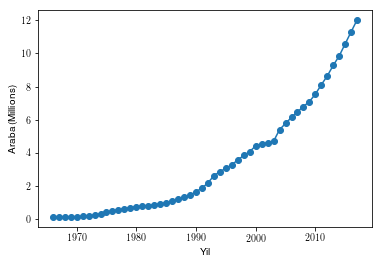

In [17]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_arac = pd.read_csv(u'data/arac.csv',sep=';')
#df_arac[['Year','Car']]

BaseYear = 1995
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Car[0:]).T/1000000.

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Yil')
plt.ylabel('Araba (Millions)')

plt.show()

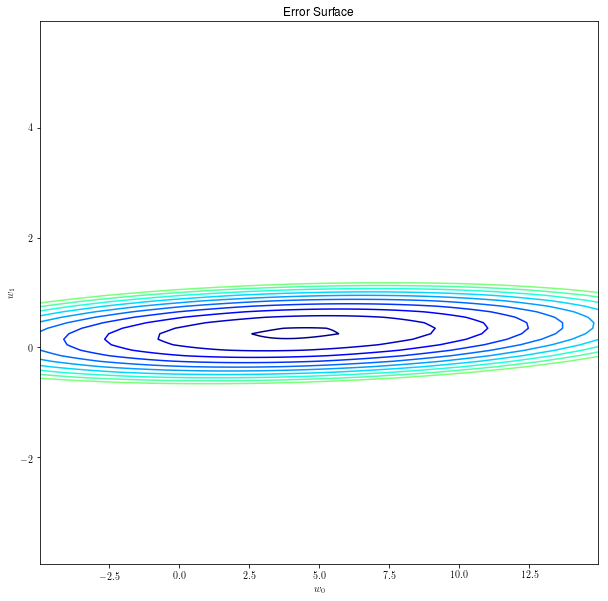

In [18]:
from itertools import product

def Error_Surface(y, A, left=0, right=1, bottom=0, top=1, step=0.1): 
    W0 = np.arange(left,right, step)
    W1 = np.arange(bottom,top, step)

    ErrSurf = np.zeros((len(W1),len(W0)))

    for i,j in product(range(len(W1)), range(len(W0))):
        e = y - A*np.matrix([W0[j], W1[i]]).T
        ErrSurf[i,j] = e.T*e/2
    
    return ErrSurf

BaseYear = 1995
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Car[0:]).T/1000000.

# Setup the vandermonde matrix
N = len(x)
A = np.hstack((np.ones((N,1)), x))



left = -5
right = 15
bottom = -4
top = 6
step = 0.05
ErrSurf = Error_Surface(y, A, left=left, right=right, top=top, bottom=bottom)

plt.figure(figsize=(10,10))
#plt.imshow(ErrSurf, interpolation='nearest', 
#           vmin=0, vmax=10000,origin='lower',
#           extent=(left,right,bottom,top), cmap='jet')

plt.contour(ErrSurf, 
            vmin=0, vmax=10000,origin='lower', levels=np.linspace(100,5000,10),
            extent=(left,right,bottom,top), cmap='jet')

plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Error Surface')
#plt.colorbar(orientation='horizontal')
plt.show()

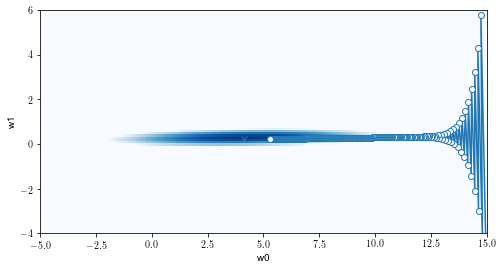

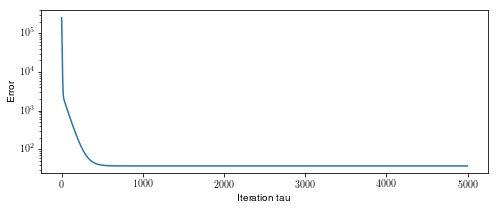

In [19]:
# An implementation of Gradient Descent for solving linear a system

# Setup the Design matrix
N = len(x)
A = np.hstack((np.ones((N,1)), x))

# Starting point
w = np.matrix('[15; -6]')

# Number of iterations
EPOCH = 5000

# Learning rate: The following is the largest possible fixed rate for this problem
#eta = 0.00016
eta = 0.00015

Error = np.zeros((EPOCH))
W = np.zeros((2,EPOCH))

for tau in range(EPOCH):
    # Calculate the error
    e = y - A*w    
    
    # Store the intermediate results
    W[0,tau] = w[0]
    W[1,tau] = w[1]
    Error[tau] = (e.T*e)/2
    
    # Compute the gradient descent step
    g = -A.T*e
    w = w - eta*g
    #print(w.T)
    
w_star = w    
plt.figure(figsize=(8,8))
plt.imshow(ErrSurf, interpolation='nearest', 
           vmin=0, vmax=1000,origin='lower',
           extent=(left,right,bottom,top),cmap='Blues_r')
plt.xlabel('w0')
plt.ylabel('w1')

ln = plt.Line2D(W[0,:300:1], W[1,:300:1], marker='o',markerfacecolor='w')
plt.gca().add_line(ln)

ln = plt.Line2D(w_star[0], w_star[1], marker='x',markerfacecolor='w')
plt.gca().add_line(ln)
plt.show()

plt.figure(figsize=(8,3))
plt.semilogy(Error)
plt.xlabel('Iteration tau')
plt.ylabel('Error')
plt.show()


# Bayır inişini hızlandırmak

## Momentum yöntemleri, a.k.a., ağır top

\begin{align}
p(\tau) & =  \nabla E(w(\tau-1)) + \beta p(\tau-1) \\
w(\tau) & =  w(\tau-1) - \alpha p(\tau) 
\end{align}

$\beta=0$, bayır inişi


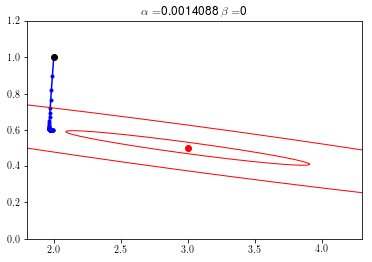

In [20]:
%matplotlib inline
import matplotlib.pylab as plt

from notes_utilities import pnorm_ball_line


import time
from IPython import display
import numpy as np


#y = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
#y = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
x = np.array([10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.])
N = len(x)

# Design matrix
A = np.vstack((np.ones(N), x)).T

w_best, E, rank, s = np.linalg.lstsq(A, y)
err = y-A.dot(w_best)
E_min = np.sum(err**2)/N


def inspect_momentum(alpha = 0.005, beta = 0.97):
    ln = pnorm_ball_line(mu=w_best, A=np.linalg.cholesky(np.linalg.inv(A.T.dot(A))),linewidth=1)
    ln2 = pnorm_ball_line(mu=w_best, A=4*np.linalg.cholesky(np.linalg.inv(A.T.dot(A))),linewidth=1)

    # initial parameters
    w0 = np.array([2., 1.])
    w = w0.copy()
    p = np.zeros(2)

    EPOCHS = 100
    W = np.zeros((2,EPOCHS))
    for epoch in range(EPOCHS):
        # Error
        err = y-A.dot(w)
        W[:,epoch] = w    
        # Mean square error
        E = np.sum(err**2)/N

        # Gradient
        dE = -2.*A.T.dot(err)/N
        p = dE + beta*p

#        if epoch%10 == 1: 
#            print(epoch,':',E)
            # print(w)    

        # Perfom one descent step
        w = w - alpha*p


#    print(E_min)

    plt.plot(W[0,:],W[1,:],'.-b')
    plt.plot(w_best[0],w_best[1],'ro')
    plt.plot(w0[0],w0[1],'ko')
    plt.xlim((1.8,4.3))
    plt.ylim((0,1.2))
    plt.title('$\\alpha = $'+str(alpha)+' $\\beta = $'+str(beta))
    plt.gca().add_line(ln)
    plt.gca().add_line(ln2)
    plt.show()
    
inspect_momentum(alpha=0.0014088, beta=0)


In [21]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import matplotlib.pylab as plt
from IPython.display import clear_output, display, HTML

interact(inspect_momentum, alpha=(0, 0.02, 0.001), beta=(0, 0.99, 0.001))

interactive(children=(FloatSlider(value=0.005, description='alpha', max=0.02, step=0.001), FloatSlider(value=0.97, description='beta', max=0.99, step=0.001), Output()), _dom_classes=('widget-interact',))

<function __main__.inspect_momentum>